In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import matthews_corrcoef
import scipy.stats


import seaborn as sns

In [ ]:
# import data for all countries 
df = pd.read_csv('/content/all_countries.csv')

In [ ]:
# explore data with head function
df.head()

,country,year,ihdi,development_status,numeric_development_status,global_north,annual_co2_per_capita
0,Albania,2021,0.710,high human development,2,0,1.618
1,Algeria,2021,0.598,medium human development,3,0,3.990
2,Angola,2021,0.407,low human development,4,0,0.619
3,Argentina,2021,0.720,high human development,2,0,4.118
4,Armenia,2021,0.688,high human development,2,0,2.439


In [ ]:
# use sns library to obtain colors for plots
pal = sns.color_palette(palette="colorblind", n_colors=10)
blue = pal[0]
orange = pal[1]
green = pal[2]
red = pal[3]
purple = pal[4]
brown=pal[5]
pink=pal[6]
grey=pal[7]
yellow=pal[8]
light_blue=pal[9]

In [ ]:
# function that will be used to plot results across different levels of human development 
# the function performs a linear regression on given data (function takes in two variables ihdi_data and co2_data)
def plot_correlation(ihdi_data, co2_data, title, x_label, y_label, fig_text, color): 
  fig1 = plt.figure(figsize=[6,6])
  ax = fig1.add_subplot(1,1,1)
  ax.scatter(ihdi_data, co2_data, color=color)

  #modifications to scatterplot
  #ax.set_title(title, family='sans-serif', size=12)
  ax.set_xlabel(x_label, family='sans-serif', size=12)
  ax.set_ylabel(y_label, family='sans-serif', size=12)
  #ax.axvline(0.8, linestyle = ':')
  #adding grid

  #adding fig text
  plt.figtext(0, -0.02, fig_text, family='sans-serif')

  # Pearson's correlation test
  coeff_arr = scipy.stats.pearsonr(ihdi_data, co2_data)
  print(coeff_arr)
  # correlation coefficient
  r = coeff_arr[0]
  print("correlation coefficient: " + f'{r:.6f}')
  # coefficient of determination
  r_squared = r**2
  print("coefficient of determination: " + str(r_squared))

  p_value = "p-value: " + str(np.around(coeff_arr[1], decimals=5))
  bool_p = coeff_arr[1] < 0.05

  #linear regression section 

  # we reshape the data because the LinearRegression function requires 2D arrays as inputs
  ihdi = ihdi_data.values.reshape(-1,1)
  co2 = co2_data.values.reshape(-1,1)

  # fit a linear model to the training data
  reg = LinearRegression().fit(ihdi, co2)

  # get regression line -
  ihdi_pred = reg.predict(ihdi)

  # plot regression line
  ax.plot(ihdi, ihdi_pred, color=red, linewidth=1, linestyle="dashed")

  # create a string variable that contains the slope and r^2 values to an appropriate number of significant figures
  slope = np.array2string(np.around(reg.coef_[0], decimals=3))
  r2 = np.array2string(np.around(reg.score(ihdi, co2), decimals=5))

  bbox = dict(boxstyle="round", fc="lightgrey", alpha=0.8, ec="lightgrey", lw=2)

  # annotate the plot with the trend 
  ax.annotate('Trend: ' + slope + ' CO\u2082/ihdi\n$R^2$: ' + r2 + "\nr: " + f'{r:.5f}' + '\n' + f'{"*p-value < 0.5" if bool_p else p_value}',
              xy=(0.1, 0.74), xycoords='axes fraction', color=red, bbox=bbox)

  plt.tight_layout()

PearsonRResult(statistic=0.7012934510327148, pvalue=4.162544753345308e-24)
correlation coefficient: 0.701293
coefficient of determination: 0.49181250446137476


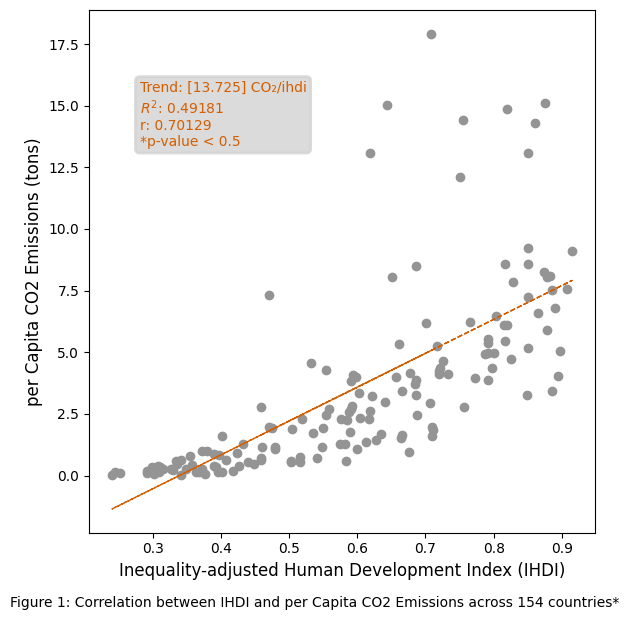

In [ ]:

# plotting data for all 154 countries included in study 
plot_correlation(df['ihdi'], df['annual_co2_per_capita'], "CO2 Emissions per Capita & IHDI (2021)",
                 "Inequality-adjusted Human Development Index (IHDI)", "per Capita CO2 Emissions (tons)",
                 "Figure 1: Correlation between IHDI and per Capita CO2 Emissions across 154 countries*", 
                 grey)

In [ ]:
# important subset of original data that contains countries only with a very high human development index
very_high_df = pd.read_csv('/content/very_high_ihdi.csv')

PearsonRResult(statistic=-0.07498290080786493, pvalue=0.710108669482846)
correlation coefficient: -0.074983
coefficient of determination: 0.005622435413562112


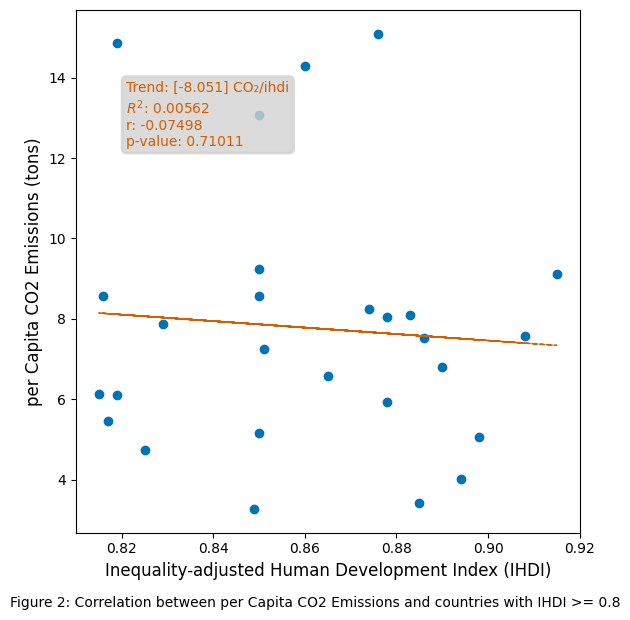

In [ ]:
# using plot_correlation function to plot subset of data importated in previous cell
plot_correlation(very_high_df['ihdi'], very_high_df['annual_co2_per_capita'], "Countries IHDI >= 0.8",
                 "Inequality-adjusted Human Development Index (IHDI)", "per Capita CO2 Emissions (tons)",
                 "Figure 2: Correlation between per Capita CO2 Emissions and countries with IHDI >= 0.8",
                 blue)

In [ ]:
# important subset of original data that contains countries only with a high human development index
high_df = pd.read_csv('/content/high_ihdi.csv')

PearsonRResult(statistic=0.13645838396169926, pvalue=0.388850470425256)
correlation coefficient: 0.136458
coefficient of determination: 0.018620890553438543


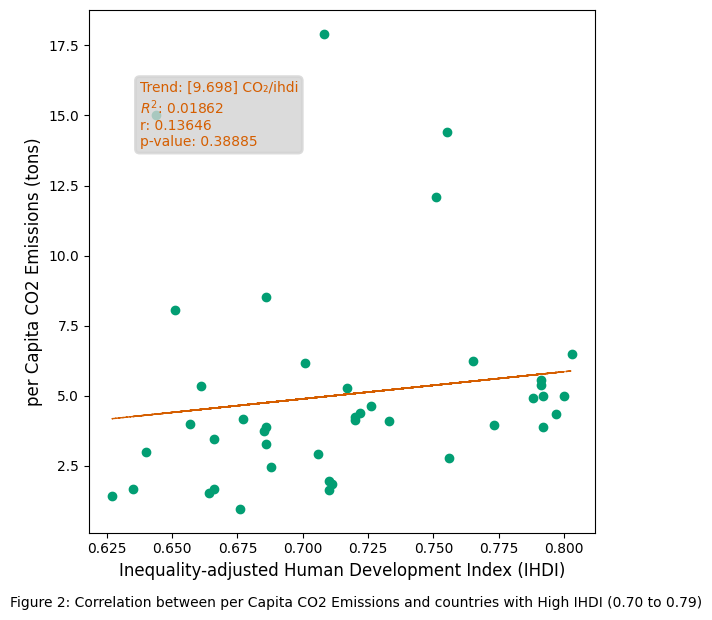

In [ ]:
# using plot_correlation function to plot subset of data importated in previous cell
plot_correlation(high_df['ihdi'], high_df['annual_co2_per_capita'], "Countries IHDI >= 0.8",
                 "Inequality-adjusted Human Development Index (IHDI)", "per Capita CO2 Emissions (tons)",
                 "Figure 2: Correlation between per Capita CO2 Emissions and countries with High IHDI (0.70 to 0.79)",
                 green)

In [ ]:
# important subset of original data that contains countries only with a very high human development index
medium_df = pd.read_csv('/content/medium_ihdi.csv')

PearsonRResult(statistic=0.3947235226636814, pvalue=0.020875713407498504)
correlation coefficient: 0.394724
coefficient of determination: 0.1558066593440258


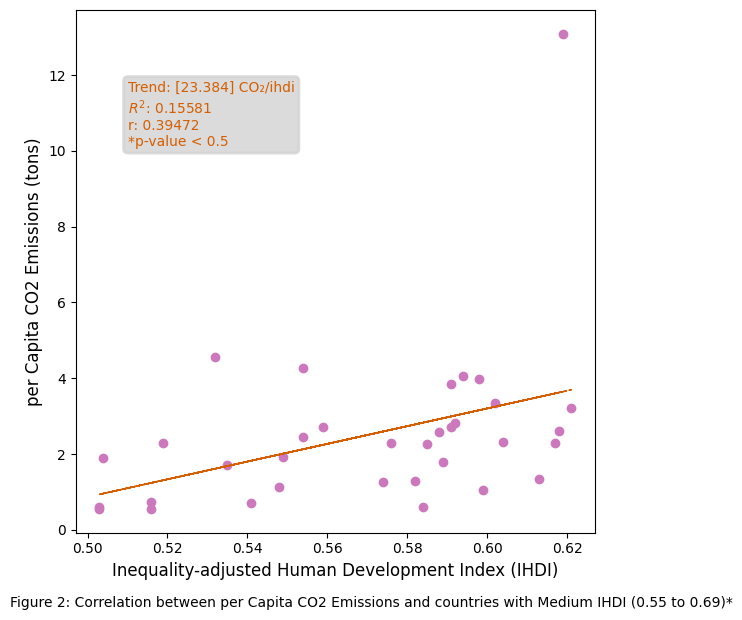

In [ ]:
plot_correlation(medium_df['ihdi'], medium_df['annual_co2_per_capita'], "Countries IHDI >= 0.8",
                 "Inequality-adjusted Human Development Index (IHDI)", "per Capita CO2 Emissions (tons)",
                 "Figure 2: Correlation between per Capita CO2 Emissions and countries with Medium IHDI (0.55 to 0.69)*",
                 purple)

In [ ]:
low_df = pd.read_csv('/content/low_ihdi.csv')

PearsonRResult(statistic=0.5051542634829925, pvalue=0.00015643384317796678)
correlation coefficient: 0.505154
coefficient of determination: 0.25518082991504465


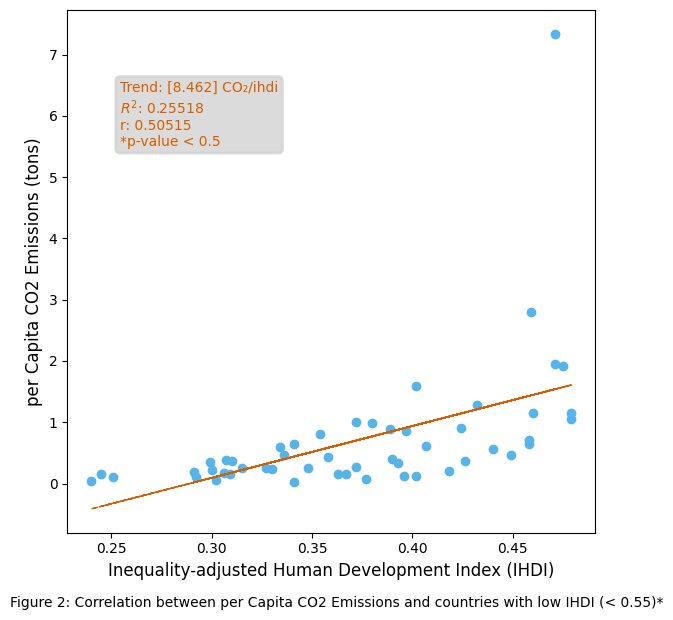

In [ ]:
plot_correlation(low_df['ihdi'], low_df['annual_co2_per_capita'], "Countries IHDI >= 0.8",
                 "Inequality-adjusted Human Development Index (IHDI)", "per Capita CO2 Emissions (tons)",
                 "Figure 2: Correlation between per Capita CO2 Emissions and countries with low IHDI (< 0.55)*",
                 light_blue)